In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df =pd.read_csv('/content/Heart_Disease_Prediction (1).csv')
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322.0,0.0,2.0,109,0.0,2.4,2,3,3,Presence
1,67,0,3,115,564.0,0.0,2.0,160,0.0,1.6,2,0,7,Absence
2,57,1,2,124,261.0,0.0,0.0,141,0.0,0.3,1,0,7,Presence
3,64,1,4,128,263.0,0.0,0.0,105,1.0,0.2,2,1,7,Absence
4,74,0,2,120,269.0,0.0,2.0,121,1.0,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199.0,1.0,0.0,162,0.0,0.5,1,0,7,Absence
266,44,1,2,120,263.0,0.0,0.0,173,0.0,0.0,1,0,7,Absence
267,56,0,2,140,294.0,0.0,2.0,153,0.0,1.3,2,0,3,Absence
268,57,1,4,140,192.0,0.0,0.0,148,0.0,0.4,2,0,6,Absence


In [ ]:
df.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'Heart Disease'],
      dtype='object')

In [ ]:
df.shape

(270, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              269 non-null    float64
 5   FBS over 120             269 non-null    float64
 6   EKG results              269 non-null    float64
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          269 non-null    float64
 9   ST depression            268 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(5), int64(8), o

In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                1
FBS over 120               1
EKG results                1
Max HR                     0
Exercise angina            1
ST depression              2
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
df.fillna(method='ffill',inplace=True)

In [ ]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [ ]:
x=[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium']]

In [ ]:
y=[['Heart Disease']]

In [ ]:
# Assuming 'df' is your DataFrame containing the actual data
x = df[['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium']]
y = df[['Heart Disease']]

from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [ ]:
xtrain.shape

(216, 13)

In [ ]:
xtest.shape

(54, 13)

In [ ]:
ytrain.shape

(216, 1)

In [ ]:
ytest.shape

(54, 1)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(x, y)
ypred=clf.predict(xtest)
score=accuracy_score(ytest,ypred)
print(score)

1.0


In [ ]:
prediction=clf.predict([[52,1,0,125,212,0,1,168,0,1.0,2,2,3]])
print(prediction)

['Absence']


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


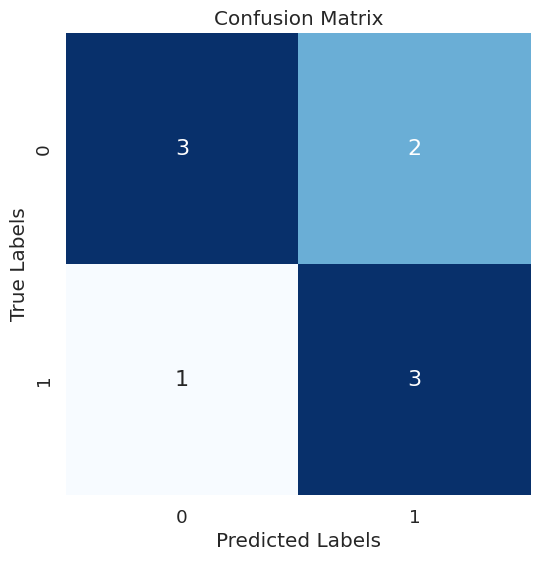

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Replace y_true and y_pred with your actual data
y_test = [0, 1, 0, 1, 1, 0, 0, 0, 1]
y_pred = [0, 0, 1, 1, 1, 0, 0, 1, 1]

cm = confusion_matrix(y_test, y_pred)
# Create a heatmap of the confusion matrix
sns.set(font_scale=1.2)
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 16}, cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

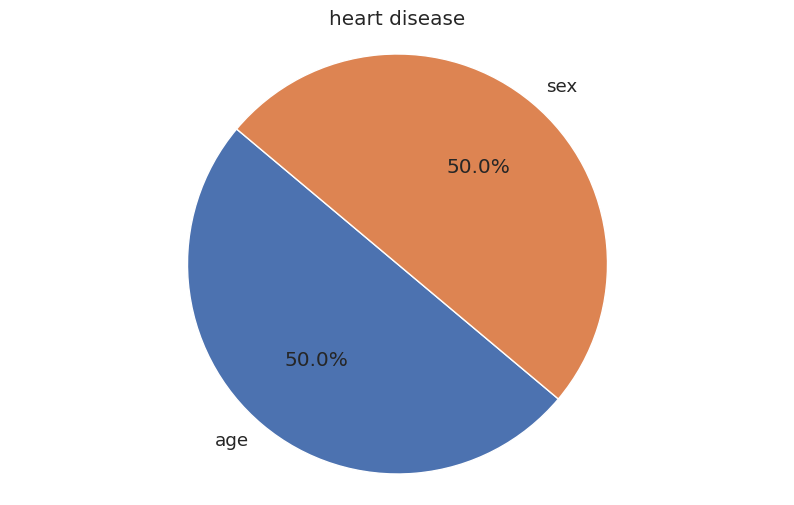

In [ ]:
import matplotlib.pyplot as plt

# Sample data
df= ['age','sex']
values = [1.0,1.0]  # Corresponding percentages

# Create a pie chart
plt.figure(figsize=(10,6))
plt.pie(values, labels=df, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Add a title
plt.title('heart disease')

# Display the pie chart
plt.show()

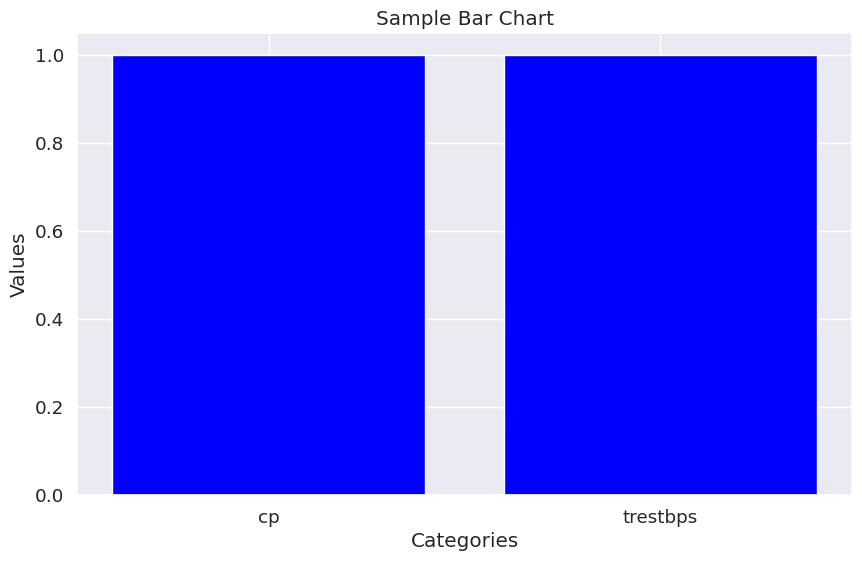

In [ ]:
import matplotlib.pyplot as plt

# Sample data
categories = ['cp','trestbps']
values = [1.0,1.0]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='blue')

# Add labels and title
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Sample Bar Chart')

# Display the bar chart
plt.show()

In [ ]:
import pickle

In [ ]:
filename ='/content/Heart_Disease_Prediction (1).csv'
with open(filename, 'wb') as file:
    pickle.dump(clf, file)

In [ ]:
import os
import pickle
if os.path.isfile(r"heart.pkl"):
    print("File Exists")
else:
    pickle.dump(clf,open('/content/Heart_Disease_Prediction (1).csv','wb'))
    print("Model Loaded!")

Model Loaded!
